In [2]:
import random
import numpy as np
import pgl
import display

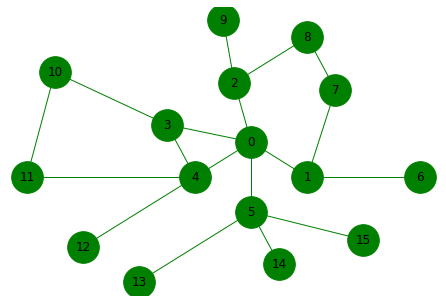

In [3]:
def build_graph():
    # 定义节点的个数；每个节点用一个数字表示，即从0~9
    num_node = 16 
    # 添加节点之间的边，每条边用一个tuple表示为: (src, dst)
    edge_list = [(2, 0), (1, 0), (3, 0),(4, 0), (5, 0), 
             (6, 1), (7, 1), (8, 2), (9, 2), (8, 7),
             (10, 3), (4, 3), (11, 10), (11, 4), (12, 4),
             (13, 5), (14, 5), (15, 5)]

    g = pgl.graph.Graph(num_nodes = num_node, edges = edge_list)

    return g

# 创建一个图对象，用于保存图网络的各种数据。
g = build_graph()
display.display_graph(g)

In [4]:
def traverse(item):
    """traverse
    """
    if isinstance(item, list) or isinstance(item, np.ndarray):
        for i in iter(item):
            for j in traverse(i):
                yield j
    else:
        yield item

def flat_node_and_edge(nodes):
    """这个函数的目的是为了将 list of numpy array 扁平化成一个list
    例如： [array([7, 8, 9]), array([11, 12]), array([13, 15])] --> [7, 8, 9, 11, 12, 13, 15]
    """
    nodes = list(set(traverse(nodes)))
    return nodes

def graphsage_sample(graph, start_nodes, sample_num):
    subgraph_edges = []
    # pre_nodes: a list of numpy array, 
    pre_nodes = graph.sample_predecessor(start_nodes, sample_num)

    # 根据采样的子节点， 恢复边
    for dst_node, src_nodes in zip(start_nodes, pre_nodes):
        for node in src_nodes:
            subgraph_edges.append((node, dst_node))

    # flat_node_and_edge： 这个函数的目的是为了将 list of numpy array 扁平化成一个list
    # [array([7, 8, 9]), array([11, 12]), array([13, 15])] --> [7, 8, 9, 11, 12, 13, 15]
    subgraph_nodes = flat_node_and_edge(pre_nodes)

    return subgraph_nodes, subgraph_edges

layer1_nodes:  [2, 4, 5]
layer1_edges:  [(4, 0), (2, 0), (5, 0)]


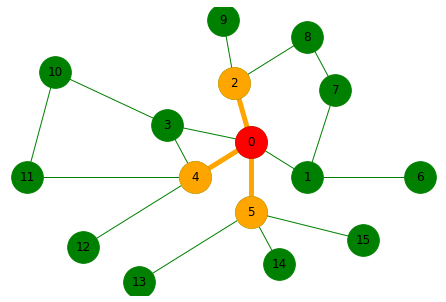

In [5]:
seed = 458
np.random.seed(seed)
random.seed(seed)

start_nodes = [0]

layer1_nodes, layer1_edges = graphsage_sample(g, start_nodes, sample_num=3)
print('layer1_nodes: ', layer1_nodes)
print('layer1_edges: ', layer1_edges)
display.display_subgraph(g, {'orange': layer1_nodes}, {'orange': layer1_edges})

layer2_nodes:  [8, 9, 11, 12, 14, 15]
layer2_edges:  [(8, 2), (9, 2), (11, 4), (12, 4), (14, 5), (15, 5)]


/Users/zhengqixin/opt/anaconda3/envs/Paddle/lib/python3.6/site-packages/pgl/graph.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self._sorted_v, self._indptr, index=u)


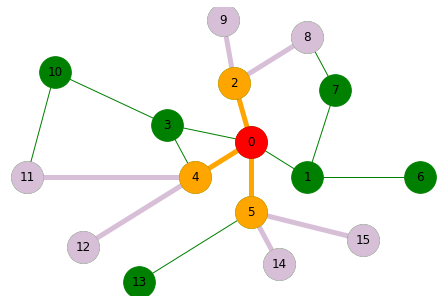

In [6]:
layer2_nodes, layer2_edges = graphsage_sample(g, layer1_nodes, sample_num=2)
print('layer2_nodes: ', layer2_nodes)
print('layer2_edges: ', layer2_edges)
display.display_subgraph(g, {'orange': layer1_nodes, 'Thistle': layer2_nodes}, {'orange': layer1_edges, 'Thistle': layer2_edges})